<a href="https://colab.research.google.com/github/abhinavuser/team-ampere/blob/main/ampere_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
!pip install tensorflow opencv-python matplotlib

Starting training process...
Step 1: Preparing synthetic dataset...
Created synthetic dataset with:
- 100 training images per class
- 20 validation images per class

Step 2: Training model...
Found 300 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6767 - loss: 0.6460 - val_accuracy: 1.0000 - val_loss: 0.0377
Epoch 2/10
1/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0621

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 505ms/step - accuracy: 1.0000 - loss: 0.0621 - val_accuracy: 1.0000 - val_loss: 0.0340
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 1.0000 - loss: 0.0217 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 1.0000 - loss: 6.6136e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 6.4017e-04
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 5.6487e-04
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 1.0000 - loss: 6.7460e-04 - val_accuracy: 1.0000 - val_loss: 5.

Model saved as 'small_car_model.h5'

Step 3: Plotting results...


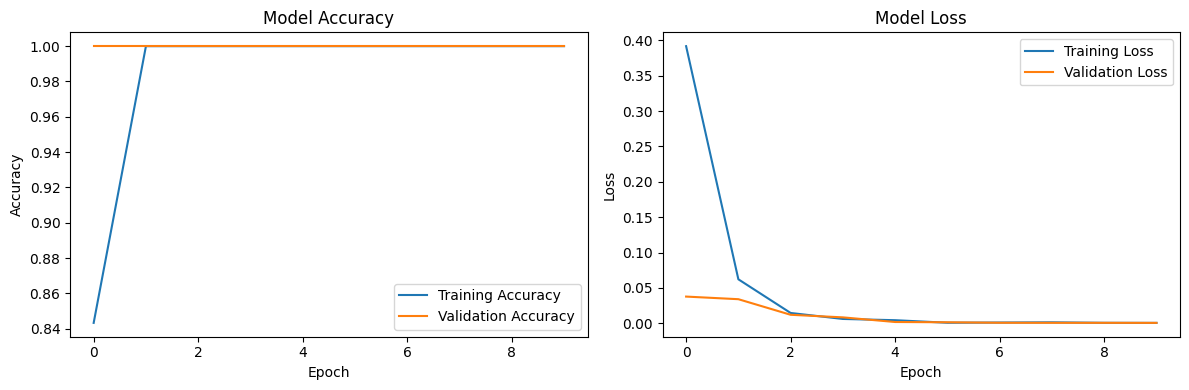


Step 4: Testing model...



Testing model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
True direction: left
Predicted direction: forward
Confidence: 100.00%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
True direction: forward
Predicted direction: left
Confidence: 99.99%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
True direction: right
Predicted direction: right
Confidence: 99.95%



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os
import urllib.request
import zipfile
import shutil
from PIL import Image
import random

def create_model():
    base_model = MobileNetV2(weights='imagenet',
                            include_top=False,
                            input_shape=(224, 224, 3))

    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

def prepare_synthetic_dataset():
    """
    Create a synthetic dataset for training
    """
    # Create directories
    base_dir = 'driving_data'
    for split in ['train', 'val']:
        for direction in ['left', 'forward', 'right']:
            os.makedirs(f'{base_dir}/{split}/{direction}', exist_ok=True)

    # Generate synthetic images
    def create_direction_image(direction, index, split):
        img = Image.new('RGB', (224, 224), color='white')
        pixels = img.load()

        # Create simple patterns for each direction
        if direction == 'left':
            # Left-pointing pattern
            for i in range(50, 174):
                for j in range(112-20, 112+20):
                    if (174-i) > abs(j-112):
                        pixels[i, j] = (255, 0, 0)
        elif direction == 'right':
            # Right-pointing pattern
            for i in range(50, 174):
                for j in range(112-20, 112+20):
                    if (i-50) > abs(j-112):
                        pixels[i, j] = (0, 255, 0)
        else:  # forward
            # Forward-pointing pattern
            for i in range(112-20, 112+20):
                for j in range(50, 174):
                    if (174-j) > abs(i-112):
                        pixels[i, j] = (0, 0, 255)

        # Add some random noise
        for _ in range(1000):
            x = random.randint(0, 223)
            y = random.randint(0, 223)
            pixels[x, y] = (random.randint(0, 255),
                          random.randint(0, 255),
                          random.randint(0, 255))

        img.save(f'driving_data/{split}/{direction}/image_{index}.jpg')

    # Generate 100 images per class for training
    for direction in ['left', 'forward', 'right']:
        for i in range(100):
            create_direction_image(direction, i, 'train')
        # Generate 20 images per class for validation
        for i in range(20):
            create_direction_image(direction, i, 'val')

    print("Created synthetic dataset with:")
    print("- 100 training images per class")
    print("- 20 validation images per class")

def train_model():
    # Create data generators
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    # Setup data generators
    train_generator = train_datagen.flow_from_directory(
        'driving_data/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    validation_generator = val_datagen.flow_from_directory(
        'driving_data/val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    # Create and train model
    model = create_model()

    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // 32,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // 32
    )

    # Save the model
    model.save('small_car_model.h5')
    print("Model saved as 'small_car_model.h5'")

    return history

def test_model(model_path='small_car_model.h5'):
    model = tf.keras.models.load_model(model_path)

    # Test on a few validation images
    test_dir = 'driving_data/val'
    directions = ['left', 'forward', 'right']

    print("\nTesting model predictions:")
    for direction in directions:
        test_image_path = os.path.join(test_dir, direction, 'image_0.jpg')
        img = tf.keras.preprocessing.image.load_img(
            test_image_path, target_size=(224, 224)
        )
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) / 255.0

        predictions = model.predict(img_array)
        predicted_direction = directions[np.argmax(predictions[0])]
        confidence = np.max(predictions[0]) * 100

        print(f"True direction: {direction}")
        print(f"Predicted direction: {predicted_direction}")
        print(f"Confidence: {confidence:.2f}%\n")

if __name__ == "__main__":
    print("Starting training process...")
    print("Step 1: Preparing synthetic dataset...")
    prepare_synthetic_dataset()

    print("\nStep 2: Training model...")
    history = train_model()

    print("\nStep 3: Plotting results...")
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("\nStep 4: Testing model...")
    test_model()